Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)
- [Hadley Wickham's famous paper](http://vita.had.co.nz/papers/tidy-data.html) on Tidy Data

**Always start with imports**

In [0]:
# those are the typical imports for just about any Pandas project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Part 1. Simple Examples

1.1 Concatenate

first lets create 2 dataframes df1 and df2


In [8]:
# create df1 
df1 = pd.DataFrame([['a',1],['b',2]],columns=['letter','number'])
df1.head()

,letter,number
0,a,1
1,b,2


In [9]:
# create df2
df2 = pd.DataFrame([['c',3],['d',4]],columns=['letter','number'])
df2.head()

,letter,number
0,c,3
1,d,4


In [11]:
# lets stick the dataframes one on the top of the other using 'concat'
# using 'axis=0' indicates a row operation, and is the default param, so can be omitted 
df3 = pd.concat([df1,df2],axis=0)
df3


,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [12]:
# lets stick them next to each other
df4 = pd.concat([df1,df2],axis=1)
df4

,letter,number,letter,number
0,a,1,c,3
1,b,2,d,4


1.2 Merge

Merge joins 2 dataframes based on a common key

In [40]:
# stock names
stockname = pd.DataFrame({'Symbol': ['AMZN','MSFT','FB','AAPL','GOOGL'], 
                          'Name': ['Amazon','Microsoft','Facebook','Apple','Google']})
stockname

,Symbol,Name
0,AMZN,Amazon
1,MSFT,Microsoft
2,FB,Facebook
3,AAPL,Apple
4,GOOGL,Google


In [16]:
# stock prices
openprice = pd.DataFrame({'Symbol': ['AAPL','MSFT','GOOGL','FB','AMZN'], 
                          'OpenPrice': [217.51,96.54,501.3,51.45,1703.34]})
openprice

,Symbol,OpenPrice
0,AAPL,217.51
1,MSFT,96.54
2,GOOGL,501.30
3,FB,51.45
4,AMZN,1703.34


In [18]:
# Merge the 2 dataframes above
named_stocks = pd.merge(openprice,stockname)
named_stocks

,Symbol,OpenPrice,Name
0,AAPL,217.51,Apple
1,MSFT,96.54,Microsoft
2,GOOGL,501.30,Google
3,FB,51.45,Facebook
4,AMZN,1703.34,Amazon


In [19]:
# create a 3rd dataset of weekly highs
wkhigh = pd.DataFrame({'Symbol':['FB','AMZN','AAPL','MSFT','NFLX'],
                       '52wkHigh':[60.79,2050.49,233.47,110.11,303.22]})
wkhigh

,Symbol,52wkHigh
0,FB,60.79
1,AMZN,2050.49
2,AAPL,233.47
3,MSFT,110.11
4,NFLX,303.22


In [20]:
# no merge that with the named stocks
# the 'on' param indicates a specific column that is contained in both dataframes.
full_stocks = pd.merge(named_stocks,wkhigh, on='Symbol')
full_stocks
# we see the result contains only the symbols that are present in both dataframes
# the reason is the default param 'how' = 'inner', which makes the inner join

,Symbol,OpenPrice,Name,52wkHigh
0,AAPL,217.51,Apple,233.47
1,MSFT,96.54,Microsoft,110.11
2,FB,51.45,Facebook,60.79
3,AMZN,1703.34,Amazon,2050.49


In [37]:
# we can make left or right merge (join) which includes all from left or right
full_stocks = pd.merge(named_stocks,wkhigh, on='Symbol', how='left')
full_stocks = pd.merge(named_stocks,wkhigh, on='Symbol', how='right')
full_stocks

,Symbol,OpenPrice,Name,52wkHigh
0,AAPL,217.51,Apple,233.47
1,MSFT,96.54,Microsoft,110.11
2,FB,51.45,Facebook,60.79
3,AMZN,1703.34,Amazon,2050.49
4,NFLX,NaN,NaN,303.22


In [38]:
full_stocks = pd.merge(named_stocks,wkhigh, on='Symbol', how='outer')
full_stocks

,Symbol,OpenPrice,Name,52wkHigh
0,AAPL,217.51,Apple,233.47
1,MSFT,96.54,Microsoft,110.11
2,GOOGL,501.30,Google,NaN
3,FB,51.45,Facebook,60.79
4,AMZN,1703.34,Amazon,2050.49
5,NFLX,NaN,NaN,303.22


In [35]:
# this website has info about Merge in Pandas
# https://www.shanelynn.ie/merge-join-dataframes-python-pandas-index-1/

# this is code to display a '.png' inside of a jupiter notebook
from IPython.display import display, Image 
url = 'https://shanelynnwebsite-mid9n9g1q9y8tt.netdna-ssl.com/wp-content/uploads/2017/03/join-types-merge-names.jpg'
venn_diagram = Image(url=url, width=600)
display(venn_diagram)

 1.3 Reshape: melt and pivot_table


In [39]:
full_stocks.shape

(6, 4)

Why reshape data?
Some libraries prefer data in different formats
  For example, the Seaborn prefers data in 'Tidy' format, which is also called 'long-form'.
The rules for that format are:
  - each variable is a column
  - each observation is a row

Hadley Wickham (the creator of the R language) wrote a paper about 'wide' format vs 'tidy' format  

'Wide' format is more easily read by humans, while 'tidy' format is more easily read by machines


In [51]:
# lets create a simple table
myindex = ['John Smith', 'Jane Doe', 'Mary Johnson']
mycolumns = ['treatmenta','treatmentb']
table1 = pd.DataFrame(
      [[ np.nan, 2],[16, 11],[3, 1]],
      columns=mycolumns, index=myindex
)
table1

# this table1 is in so called 'wide' format

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [52]:
# exactly the same information can be displayed by transposing the table
# this is also another form of 'wide' format though

table2 = table1.T
table2


,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


**Table 1 --> Tidy**

In [53]:
# now let see an example of tidy format of the same data
# how to convert table1 to 'tidy' - can be done with pandas melt function
# we will want to have the following columns: 'name', 'trt', 'result'

# first lets get the column names as a list
table1.columns.tolist()
# or list(table1.columns)


['treatmenta', 'treatmentb']

In [54]:
# next lets get the index values as another list
table1.index.tolist()

['John Smith', 'Jane Doe', 'Mary Johnson']

In [55]:
# next reset the index so to move the names into a column
table1 = table1.reset_index()
table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [58]:
# convert the table1 from 'wide' to 'tidy' w 'melt' method
tidy = table1.melt(id_vars='index'  , value_vars=['treatmenta','treatmentb'] )
tidy

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [59]:
# now rename columns 
tidy = tidy.rename(columns={'index':'name','variable':'trt', 'value':'result'})
tidy

,name,trt,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [60]:
# shorten the 'trt' values
tidy['trt'] = tidy['trt'].str.replace('treatmenta', 'a')
tidy['trt'] = tidy['trt'].str.replace('treatmentb', 'b')
tidy


,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


**Table 2 --> Tidy**

In [0]:
# use it as an exercise 

**Tidy --> Table 1**

In [61]:
# pivot_table method is the inverse of melt
# so lets do it all in reverse
wide = tidy.pivot_table(index='name', columns='trt', values='result')
wide

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


**Tidy --> Table 2**

In [0]:
# use it as an exercise 


**Seaborn examples**

Seaborn prefers data in 'Tidy' format, which is also called 'long-form'. The rules for that format are:

  - each variable is a column
  - each observation is a row

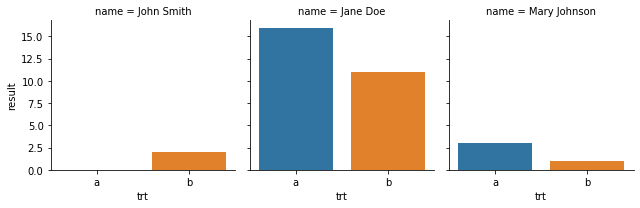

In [63]:
# plot this using seaborn
sns.catplot(data=tidy, x='trt', y='result', col='name', kind='bar', height=3);

# Part 2. More complex examples

2.1 Concatenating time-series datasets from Chicago

In [0]:
# here's some data about Chicago bikesharing.
source_path = 

## Download data

We’ll work with a dataset of [3 Million Instacart Orders, Open Sourced](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)!

In [0]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-04-28 02:31:08--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.85.125
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.85.125|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  43.6MB/s    in 4.2s    

2019-04-28 02:31:12 (46.5 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [0]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [0]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [0]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Join Datasets

## Goal: Reproduce this example

The first two orders for user id 1:

In [0]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)

display(example)

## Load data

Here's a list of all six CSV filenames

In [0]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


For each CSV
- Load it with pandas
- Look at the dataframe's shape
- Look at its head (first rows)
- `display(example)`
- Which columns does it have in common with the example we want to reproduce?

### aisles

### departments

### order_products__prior

### order_products__train

### orders

### products

## Concatenate order_products__prior and order_products__train

## Get a subset of orders — the first two orders for user id 1

From `orders` dataframe:
- user_id
- order_id
- order_number
- order_dow
- order_hour_of_day

## Merge dataframes

Merge the subset from `orders` with columns from `order_products`

Merge with columns from `products`

# Reshape Datasets

## Why reshape data?

#### Some libraries prefer data in different formats

For example, the Seaborn data visualization library prefers data in "Tidy" format often (but not always).

> "[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets) This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

> - Each variable is a column
- Each observation is a row

> A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

#### Data science is often about putting square pegs in round holes

Here's an inspiring [video clip from _Apollo 13_](https://www.youtube.com/watch?v=ry55--J4_VQ): “Invent a way to put a square peg in a round hole.” It's a good metaphor for data wrangling!

## Hadley Wickham's Examples

From his paper, [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

"Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild. 

The table has two columns and three rows, and both rows and columns are labelled."

In [0]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


"There are many ways to structure the same underlying data. 

Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different."

In [0]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


"Table 3 reorganises Table 1 to make the values, variables and obserations more clear.

Table 3 is the tidy version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

## Table 1 --> Tidy

We can use the pandas `melt` function to reshape Table 1 into Tidy format.

## Table 2 --> Tidy

In [0]:
##### LEAVE BLANK --an assignment exercise #####

## Tidy --> Table 1

The `pivot_table` function is the inverse of `melt`.

## Tidy --> Table 2

In [0]:
##### LEAVE BLANK --an assignment exercise #####

# Seaborn example

The rules can be simply stated:

- Each variable is a column
- Each observation is a row

A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

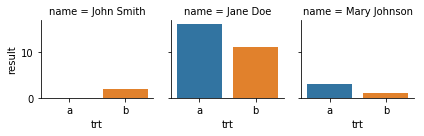

In [0]:
sns.catplot(x='trt', y='result', col='name', 
            kind='bar', data=tidy, height=2);

## Now with Instacart data

In [0]:
products = pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
                            pd.read_csv('order_products__train.csv')])

orders = pd.read_csv('orders.csv')

## Goal: Reproduce part of this example

Instead of a plot with 50 products, we'll just do two — the first products from each list
- Half And Half Ultra Pasteurized
- Half Baked Frozen Yogurt

In [0]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

So, given a `product_name` we need to calculate its `order_hour_of_day` pattern.

## Subset and Merge

One challenge of performing a merge on this data is that the `products` and `orders` datasets do not have any common columns that we can merge on. Due to this we will have to use the `order_products` dataset to provide the columns that we will use to perform the merge.

## 4 ways to reshape and plot

### 1. value_counts

### 2. crosstab

### 3. Pivot Table

### 4. melt